In [3]:
import os
import pandas as pd

In [4]:
df_ext = pd.read_csv(os.path.join('datasets','db2','Ext.csv'))
df_ext2 = pd.read_csv(os.path.join('datasets','db2','Ext2.csv'))

In [6]:
df_ext2.head()

,id_vsd,num_vsd,id_fish,fish,date_vsd,volume,unit
0,7230988,8934601,400,минтай,2022-01-01 00:39:56,75480,\N
1,3420538,1439843,400,минтай,2022-01-01 01:34:08,62586,\N
2,9509257,342637,292,треска,2022-01-01 01:34:11,1155,\N
3,1894307,1801854,400,минтай,2022-01-01 01:34:05,111048,\N
4,9410489,3126516,88,окунь-клювач,2022-01-01 01:34:11,1844,\N


In [135]:
df_ext = pd.read_csv(os.path.join('db2','Ext.csv'))

## Preproccessing

### Ext
#### Remove duplicates

In [2]:
len(df_ext['id_own'].unique())

159

In [3]:
df_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260798 entries, 0 to 3260797
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id_fishery      int64 
 1   id_own          int64 
 2   date_fishery    object
 3   numPart         object
 4   id_Plat         int64 
 5   id_vsd          int64 
 6   Name_Plat       object
 7   Product_period  object
 8   Region_Plat     object
dtypes: int64(4), object(5)
memory usage: 223.9+ MB


In [4]:
df_ext['numPart'].describe()

count     3260798
unique          4
top            \N
freq      3260788
Name: numPart, dtype: object

There just 4 unique values. Let's see them

In [5]:
df_ext[df_ext['numPart']!='\\N']

,id_fishery,id_own,date_fishery,numPart,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat
3154783,4351001,6934839,2021-09-14 00:00:00,1,7527473,8344324,\N,\N,\N
3154784,4351001,6934839,2021-09-14 00:00:00,1,7527473,1887570,\N,\N,\N
3154785,4351001,6934839,2021-09-14 00:00:00,3,7527473,3240949,\N,\N,\N
3154786,4351001,6934839,2021-09-14 00:00:00,2,7527473,8431544,\N,\N,\N
3154787,4351001,6934839,2021-09-14 00:00:00,3,7527473,7810860,\N,\N,\N
3154788,3421686,6088979,2021-09-14 00:00:00,3,6845406,4977416,\N,\N,\N
3154789,3421686,6088979,2021-09-14 00:00:00,1,6845406,575387,\N,\N,\N
3154790,3421686,6088979,2021-09-14 00:00:00,3,6845406,8953643,\N,\N,\N
3154791,3421686,6088979,2021-09-14 00:00:00,3,6845406,6158965,\N,\N,\N
3154792,3421686,6088979,2021-09-14 00:00:00,2,6845406,8428528,\N,\N,\N


Not intresting. Remove this feature.

In [6]:
df_ext.drop(columns=['numPart'], inplace=True)
df_ext[df_ext['id_vsd'].duplicated()].head(3)

,id_fishery,id_own,date_fishery,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat
54815,4009512,794477,2022-04-19 00:00:00,6185761,1761759,\N,\N,\N
54816,2208303,6493928,2022-04-19 00:00:00,5022636,2962860,\N,\N,\N
54817,9088403,3846064,2022-04-19 00:00:00,123758,9232550,\N,\N,\N


In [7]:
def count_duplicated(df,id):
    return len(df[df[id].duplicated()])

'%s record is duplicated' % count_duplicated(df_ext,'id_vsd')

'45854 record is duplicated'

We see duplicated values, check what is duplicated records

In [8]:
df_ext[df_ext['id_vsd']==9232550]

,id_fishery,id_own,date_fishery,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat
19581,-1,5502023,2022-04-19 18:48:13,123758,9232550,4267051,\N,Приморский край
54817,9088403,3846064,2022-04-19 00:00:00,123758,9232550,\N,\N,\N


We see that it is same records but with more information. Try remerge same records in one.

In [9]:
df_ext_descr = df_ext[(df_ext['Name_Plat'] != '\\N') | (df_ext['Product_period'] != '\\N') | (df_ext['Region_Plat'] != '\\N')]

Check that in description table not duplicated values

In [10]:
print('In decription table %s records is duplicated' % count_duplicated(df_ext_descr,'id_vsd'))

In decription table 0 records is duplicated


In [11]:
'Unique %s ids' % len(df_ext['id_vsd'].unique())

'Unique 3214944 ids'

Merge tables

In [12]:
df_ext_wo_data=df_ext.drop(df_ext_descr.index)

In [13]:
df_ext_merged = pd.merge(
    pd.DataFrame(df_ext['id_vsd'].unique(), columns=['id_vsd']),
    df_ext_wo_data[['id_vsd','id_own','id_fishery','date_fishery','id_Plat']],
    on='id_vsd',
    how="left"
)
len(df_ext_merged)

3214944

In [14]:
df_ext_merged = pd.merge(
    df_ext_merged,
    df_ext_descr[['id_vsd','date_fishery','Name_Plat','Product_period','Region_Plat']],
    on='id_vsd',
    how="left"
)
len(df_ext_merged)

3214944

Fill `date_fishery` from describted table

In [15]:
df_ext_merged.loc[~df_ext_merged['date_fishery_y'].isna(),'date_fishery_x']=df_ext_merged['date_fishery_y']
df_ext_merged.drop(columns='date_fishery_y',inplace=True)
len(df_ext_merged)

3214944

Same work with df_ext2

In [16]:
df_ext2[df_ext2['id_vsd'].duplicated()].head(3)

,id_vsd,num_vsd,id_fish,fish,date_vsd,volume,unit
556258,5544870,9407937,-1,пикша свежая,2022-03-21 02:54:35,3,тонна
556259,7404235,6104740,-1,треска,2022-03-21 02:54:34,1,тонна
556260,9178156,4392911,-1,окунь-клювач,2022-03-21 02:54:33,0,тонна


In [17]:
'%s record is duplicated' % count_duplicated(df_ext2,'id_vsd')

'45854 record is duplicated'

In [18]:
df_ext2[df_ext2['id_vsd']==5544870]

,id_vsd,num_vsd,id_fish,fish,date_vsd,volume,unit
32570,5544870,9407937,408,пикша,2022-03-21 02:54:35,3496,\N
556258,5544870,9407937,-1,пикша свежая,2022-03-21 02:54:35,3,тонна


Seems that in duplicated records contains round values. We get more descridable records

In [19]:
'Unique %s ids' % len(df_ext2['id_vsd'].unique())

'Unique 3069426 ids'

In [20]:
df_ext2_w_fish_id = df_ext2[df_ext2['id_fish']!=-1]
print('In table with fish_id %s records is duplicated' % count_duplicated(df_ext2_w_fish_id,'id_vsd'))
df_ext2_wo_fish_id = df_ext2.drop(df_ext2_w_fish_id.index)
print('In table without fish_id %s records is duplicated' % count_duplicated(df_ext2_w_fish_id,'id_vsd'))

In table with fish_id 0 records is duplicated
In table without fish_id 0 records is duplicated


In [21]:
df_ext2_wo_fish_id.head()

,id_vsd,num_vsd,id_fish,fish,date_vsd,volume,unit
39891,7751200,7862380,-1,скумбрия холодного копчения,2022-01-14 09:25:25,250,кг
39892,3956581,3961887,-1,икра сельди соленая,2022-01-04 05:16:29,3,кг
39893,2684005,4888194,-1,готовые блюда из рыбы,2022-02-03 15:43:10,2,кг
39894,7397214,3661485,-1,путассу солено-сушеная,2022-03-21 08:49:01,174,кг
39895,5435838,7248730,-1,путассу вяленая,2022-03-21 06:22:35,50,кг


In [138]:
df_ext2_merged = pd.merge(
    pd.DataFrame(df_ext2['id_vsd'].unique(), columns=['id_vsd']),
    df_ext2_w_fish_id[['id_vsd','id_fish','fish','volume','unit','date_vsd']],
    on='id_vsd',
    how="left"
)
len(df_ext2_merged)

3069426

In [139]:
df_ext2_merged = pd.merge(
    df_ext2_merged,
    df_ext2_wo_fish_id[['id_vsd','fish','date_vsd','volume','unit']],
    on='id_vsd',
    how="left"
)
len(df_ext2_merged)

3069426

In [124]:
print('In table without fish_id %s records is duplicated' % count_duplicated(df_ext2_w_fish_id,'id_vsd'))

In table without fish_id 0 records is duplicated


In [140]:
df_ext2_merged[~(df_ext2_merged['volume_x'].isna())].head(3)

,id_vsd,id_fish,fish_x,volume_x,unit_x,date_vsd_x,fish_y,date_vsd_y,volume_y,unit_y
0,7230988,400.0,минтай,75480.0,\N,2022-01-01 00:39:56,NaN,NaN,NaN,NaN
1,3420538,400.0,минтай,62586.0,\N,2022-01-01 01:34:08,NaN,NaN,NaN,NaN
2,9509257,292.0,треска,1155.0,\N,2022-01-01 01:34:11,NaN,NaN,NaN,NaN


Fill na from describe dataset, drop unneccesary columns and fillna -1

In [141]:
if_fish_na = df_ext2_merged['id_fish'].isna()
df_ext2_merged.loc[if_fish_na,'fish_x']=df_ext2_merged['fish_y']
df_ext2_merged.loc[if_fish_na,'volume_x']=df_ext2_merged['volume_y']
df_ext2_merged.loc[if_fish_na,'unit_x']=df_ext2_merged['unit_y']
df_ext2_merged.loc[if_fish_na,'date_vsd_x']=df_ext2_merged['date_vsd_y']
df_ext2_merged=df_ext2_merged.drop(columns=['fish_y','volume_y','unit_y','date_vsd_y'])
len(df_ext2_merged)

3069426

Now try normalize fish and volume

In [142]:
df_ext2_merged['unit_x'].unique()

array(['\\N', 'кг', 'тонна'], dtype=object)

In [143]:
df_ext2_merged.loc[df_ext2_merged['unit_x']=='\\N','unit_x']='кг'
df_ext2_merged.loc[df_ext2_merged['unit_x']=='тонна','volume_x']*=1000

In [144]:
fish_class = df_ext2_merged[df_ext2_merged['id_fish']>=0][['id_fish','fish_x']].drop_duplicates()
df_ext2_merged=pd.merge(
    df_ext2_merged,
    fish_class,
    on='fish_x',
    how='left'
)
df_ext2_merged.loc[df_ext2_merged['id_fish_x'].isna(),'id_fish_x']=df_ext2_merged['id_fish_y']
df_ext2_merged.drop(columns='id_fish_y', inplace=True)

In [156]:
top_fish=df_ext2_merged.groupby('fish_x').sum().sort_values('volume_x', ascending=False)

Remove records with zero volume

In [163]:
df_ext2_merged=df_ext2_merged[~(df_ext2_merged['fish_x'].isin(top_fish[top_fish['volume_x']==0].index))]

In [178]:
top_fish[:10]
# todo classify fish by name

,id_vsd,id_fish_x,volume_x
fish_x,,,
минтай,267038523927,22391600.0,985755865.0
треска,278833446504,13024022.0,449742126.0
минтай б/г мороженый,37519436460,0.0,281485109.0
сельдь тихоокеанская,7213040962,308856.0,179568763.0
сельдь тихоокеанская н/р мороженая,5745992893,0.0,157704270.0
путассу (северная),2809158447,246627.0,85655049.0
филе минтая мороженое,43838129826,0.0,85229755.0
пикша мороженая,3170403615,0.0,52233340.0
минтай н/р мороженый,5321868834,0.0,50878872.0


Merge and dump db2

In [180]:
df_db2 = pd.merge(df_ext_merged,df_ext2_merged,on='id_vsd')
df_db2.to_csv('db2.csv',index=None)

In [105]:
df_db2=pd.read_csv('db2.csv')

In [106]:
df_db2['date_delta']=(df_db2['date_vsd_x'].astype('datetime64[ns]')-df_db2['date_fishery_x'].astype('datetime64[ns]')).apply(lambda x: x.seconds//3600)

In [76]:
df_db2.head()

,id_vsd,id_own,id_fishery,date_fishery_x,id_Plat,Name_Plat,Product_period,Region_Plat,id_fish_x,fish_x,...,unit_x,date_vsd_x,date_delta,hour_vsd,Late Night,Early Morning,Morning,Noon,Eve,Night
0,8745666,6493928.0,2208303.0,2022-05-24 00:00:00,5022636.0,NaN,NaN,NaN,292.0,треска,...,кг,2022-05-24 17:31:35,17,17,0,0,0,0,1,0
1,8745666,6493928.0,2208303.0,2022-05-24 00:00:00,5022636.0,NaN,NaN,NaN,292.0,треска,...,кг,2022-05-24 17:31:35,17,17,0,0,0,0,1,0
2,3846313,3846064.0,5538439.0,2022-05-24 00:00:00,839830.0,NaN,NaN,NaN,400.0,минтай,...,кг,2022-05-24 17:31:35,17,17,0,0,0,0,1,0
3,5215676,3107158.0,8688535.0,2022-05-24 00:00:00,9310751.0,NaN,NaN,NaN,292.0,треска,...,кг,2022-05-24 20:40:39,20,20,0,0,0,0,1,0
4,5215676,3107158.0,8688535.0,2022-05-24 00:00:00,9310751.0,NaN,NaN,NaN,292.0,треска,...,кг,2022-05-24 20:40:39,20,20,0,0,0,0,1,0


In [113]:
df_db2['hour_vsd']=df_db2['date_vsd_x'].astype('datetime64[ns]').dt.hour
prods = pd.DataFrame({'hour':range(1, 25)})

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df_db2['date_session'] = pd.cut(df_db2['hour_vsd'], bins=b, labels=l, include_lowest=True)
session_dummies = pd.get_dummies(df_db2['date_session'])
df_db2=pd.concat([df_db2.drop(columns=['date_session']),session_dummies],axis=1)

In [116]:
df_group = df_db2.groupby('id_fishery').agg({
    'id_own':'count',
    # 'id_vsd':'count',
    # 'id_Plat':'count',
    # 'fish_x':'count',
    'volume_x': ['mean','min','max','sum'],
    'Late Night': 'sum', 
    'Early Morning': 'sum', 
    'Morning': 'sum', 
    'Noon': 'sum', 
    'Eve': 'sum',
    'Night': 'sum',
    'date_delta': ['mean','median','min','max']
})

In [117]:
df_group

id_own       volume_x                               Late Night  \
            count           mean      min       max        sum        sum   
id_fishery                                                                  
33295.0        59   74264.745763    420.0  148200.0  4381620.0       33.0   
38529.0       563    2364.088810     35.0   35745.0  1330982.0      518.0   
66070.0        55    4723.000000    425.0   21729.0   259765.0       39.0   
86689.0       647    5911.440495      1.0   93619.0  3824702.0      610.0   
101043.0      554    8357.922383      4.0   94000.0  4630289.0      527.0   
...           ...            ...      ...       ...        ...        ...   
9301657.0     306    9952.650327     14.0   23840.0  3045511.0      194.0   
9307456.0       6    3992.500000    963.0    6694.0    23955.0        0.0   
9380862.0      57   10388.473684   1588.0   16564.0   592143.0       54.0   
9472820.0     100    2330.740000    187.0    6060.0   233074.0       95.0   
9489364.0      94  102871.414894  10055.0  248184.0  9669913.0       81.0   

           Early Morning Morning  Noon Eve Night date_delta                 
                     sum     sum   sum sum   sum       mean median min max  
id_fishery                                                                  
33295.0              1.0     1.0   3.0   1    20   5.169492    0.0   0  23  
38529.0              0.0    34.0  11.0   0     0   0.509769    0.0   0  13  
66070.0             14.0     2.0   0.0   0     0   0.127273    0.0   0   4  
86689.0             12.0    25.0   0.0   0     0   0.922720    0.0   0  12  
101043.0             8.0     1.0  18.0   0     0   0.851986    0.0   0  13  
...                  ...     ...   ...  ..   ...        ...    ...  ..  ..  
9301657.0            2.0     8.0   0.0   0   102   3.173203    0.0   0  23  
9307456.0            0.0     6.0   0.0   0     0  11.166667   11.0  11  12  
9380862.0            1.0     2.0   0.0   0     0   1.087719    1.0   0  12  
9472820.0            2.0     3.0   0.0   0     0   0.130000    0.0   0   6  
9489364.0            7.0     1.0   0.0   0     5   0.489362    0.0   0   5  

[326 rows x 15 columns]

In [122]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

In [123]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(df_group)


/home/Kirill.Fomenko/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/Kirill.Fomenko/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [124]:
pca = PCA (n_components=2)
X_reduced = pca.fit_transform(X_scale)

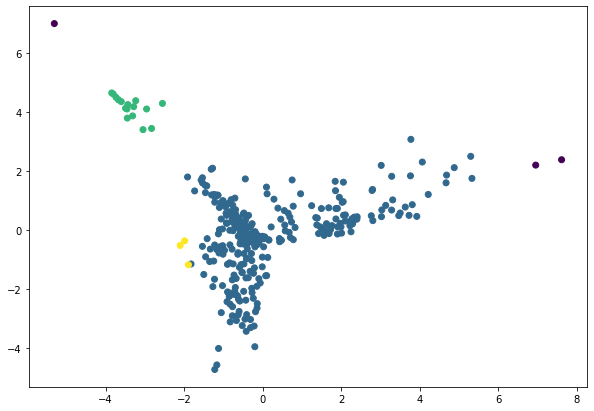

In [133]:
pred = DBSCAN(eps=1.6, min_samples=2).fit_predict(X_reduced)

plt.figure(figsize = (10,7))
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=pred)
plt.show()

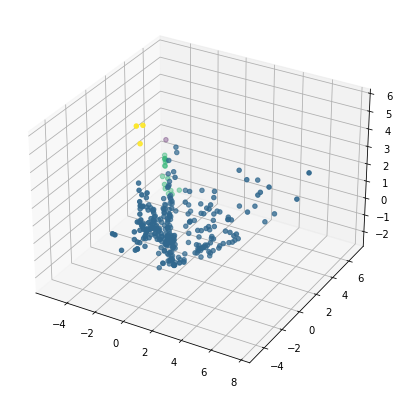

In [134]:
pca = PCA (n_components=3)
X_reduced = pca.fit_transform(X_scale)

pred = DBSCAN(eps=1.9, min_samples=2).fit_predict(X_reduced)

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection="3d")
x,y,z = [X_reduced[:,i] for i in range(3)]
ax.scatter(x,y,z, c=pred)
plt.show()